# Predicción de enfermedades cardíacas mediante aprendizaje automático
## 1. Definición del problema
Dados los parámetros clínicos de un paciente, ¿podemos predecir si padece o no una enfermedad cardíaca?

**Conjunto de datos**
Hospital de la Universidad de Cleveland. La base de datos se compone de información de pacientes que fueron sometidos a pruebas de diagnóstico en el hospital.

** Diccionario de datos **
Edad - edad en años
sex0 - (1 = masculino; 0 = femenino)

Dolor de Pecho - tipo de dolor en el pecho**
* 0: Angina típica: dolor en el pecho relacionado con una disminución del suministro de sangre al corazón
* 1: Angina atípica: dolor en el pecho no relacionado con el corazón
* 2: Dolor no anginoso: típicamente espasmos esofágicos (no relacionados con el corazón)
* 3: Asintomático: dolor en el pecho que no muestra signos de enfermedad
  
Presión Arterial - presión arterial en reposo** (en mm Hg al momento del ingreso al hospital)
cualquier valor por encima de 130-140 es generalmente motivo de preocupación

Colesterol - colesterol sérico en mg/dl**
suero = LDL + HDL + .2 * triglicéridos
por encima de 200 es motivo de preocupación

Azucar en sangre - (azúcar en sangre en ayunas > 120 mg/dl)** (1 = verdadero; 0 = falso)
'>126' mg/dL indica diabetes

Electrocardiograma: resultados electrocardiográficos en reposo**
* 0: Nada que destacar
* 1: Anormalidad de la onda ST-T
puede variar desde síntomas leves hasta problemas graves
indica un latido cardíaco anormal
* 2: Hipertrofia ventricular izquierda posible o definitiva
Agrandamiento de la cámara de bombeo principal del corazón

Frecuencia cardiacac: frecuencia cardíaca máxima alcanzada**
Angina inducida angina inducida por el ejercicio (1 = sí; 0 = no)

oldpeak** - depresión del segmento ST inducida por el ejercicio en relación con el reposo
observa el estrés del corazón durante el ejercicio
un corazón enfermo se estresará más

## Preparación de las herramientas
* pandas para el análisis de datos.
* NumPy para operaciones numéricas.
* Matplotlib/seaborn para la representación gráfica o la visualización de datos.
* Scikit-Learn para la evaluación y el modelado del aprendizaje automático.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
import ipywidgets as widgets
from IPython.display import display, clear_output

# Cargar el conjunto de datos
url = "heart.csv"
data = pd.read_csv(url)

# Eliminar las columnas innecesarias
data = data.drop(columns=['slp', 'caa', 'thall'], errors='ignore')

In [2]:
df = pd.read_csv("heart.csv") # 'DataFrame' shortened to 'df'
# Eliminar las columnas innecesarias
df = df.drop(columns=['slp', 'caa', 'thall'], errors='ignore')
df.shape # (rows, columns)

(303, 11)

In [3]:
df.head()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucar_sangre,electrocardiograma,frecuencia_cardiaca,angina_inducida,oldpeak,output
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1


In [4]:
df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [5]:
# Normalized value counts
df.output.value_counts(normalize=True)

output
1    0.544554
0    0.455446
Name: proportion, dtype: float64

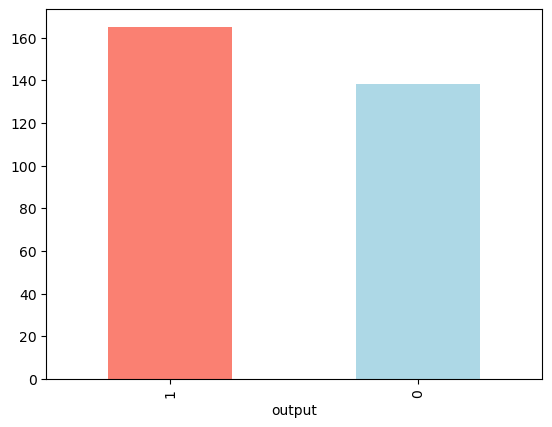

In [6]:
# Plot the value counts with a bar graph
df.output.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 303 non-null    int64  
 1   sexo                 303 non-null    int64  
 2   dolor_pecho          303 non-null    int64  
 3   presion_arterial     303 non-null    int64  
 4   colesterol           303 non-null    int64  
 5   azucar_sangre        303 non-null    int64  
 6   electrocardiograma   303 non-null    int64  
 7   frecuencia_cardiaca  303 non-null    int64  
 8   angina_inducida      303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  output               303 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.2 KB


In [8]:
df.describe()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,azucar_sangre,electrocardiograma,frecuencia_cardiaca,angina_inducida,oldpeak,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


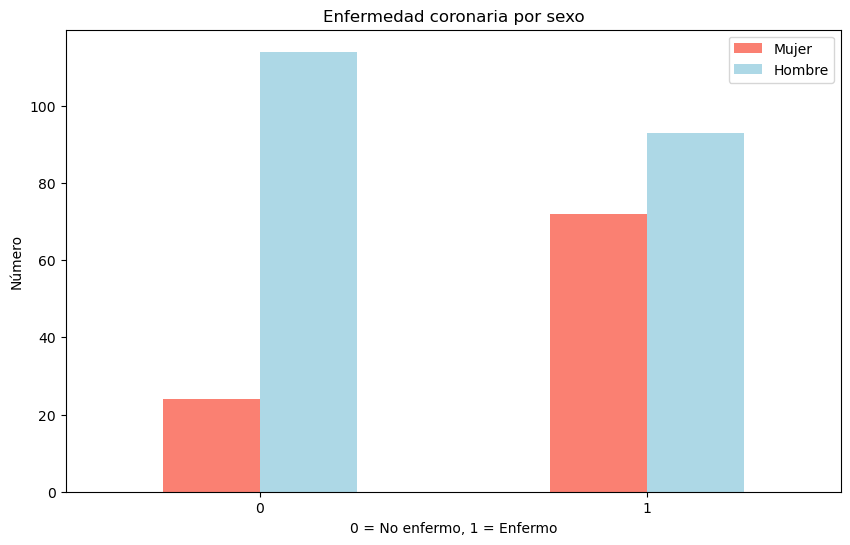

In [9]:
# Create a plot
pd.crosstab(df.output, df.sexo).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

# Add some attributes to it
plt.title("Enfermedad coronaria por sexo")
plt.xlabel("0 = No enfermo, 1 = Enfermo")
plt.ylabel("Número")
plt.legend(["Mujer", "Hombre"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

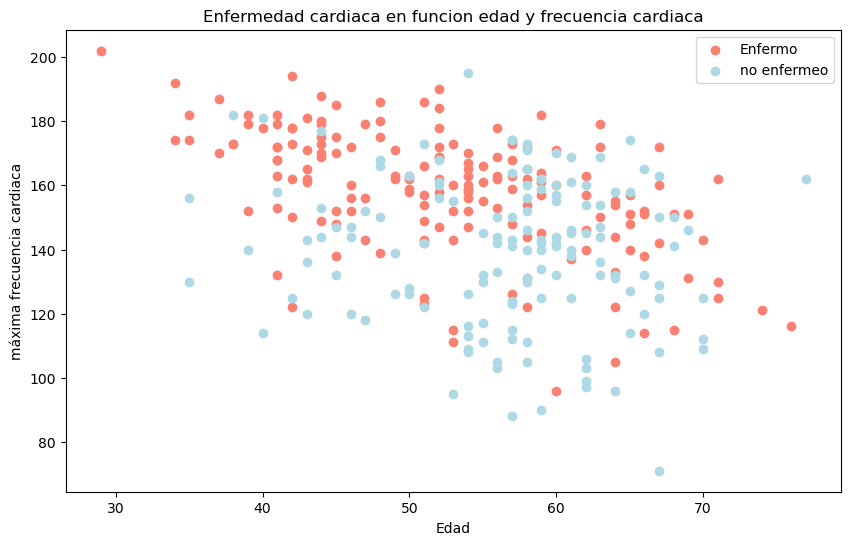

In [10]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.edad[df.output==1], 
            df.frecuencia_cardiaca[df.output==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.edad[df.output==0], 
            df.frecuencia_cardiaca[df.output==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Enfermedad cardiaca en funcion edad y frecuencia cardiaca")
plt.xlabel("Edad")
plt.legend(["Enfermo", "no enfermeo"])
plt.ylabel("máxima frecuencia cardiaca");

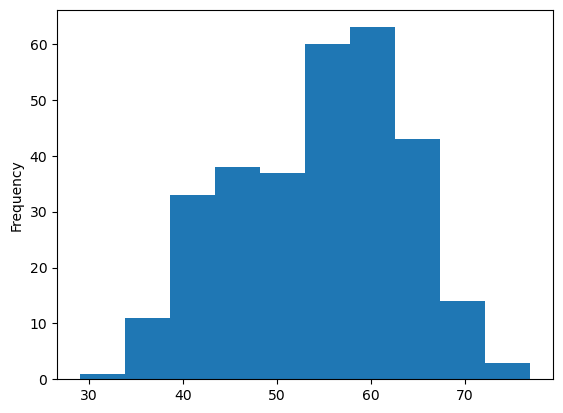

In [11]:
# Histograms to check the distribution of a variable
df.edad.plot.hist();

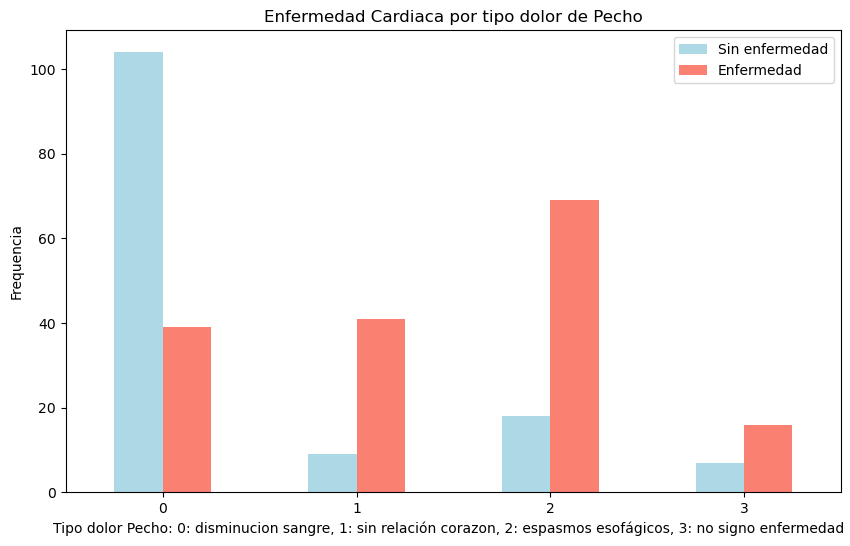

In [12]:
# Create a new crosstab and base plot
pd.crosstab(df.dolor_pecho, df.output).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Enfermedad Cardiaca por tipo dolor de Pecho")
plt.xlabel("Tipo dolor Pecho: 0: disminucion sangre, 1: sin relación corazon, 2: espasmos esofágicos, 3: no signo enfermedad  ")
plt.ylabel("Frequencia")
plt.legend(["Sin enfermedad", "Enfermedad"])
plt.xticks(rotation = 0);

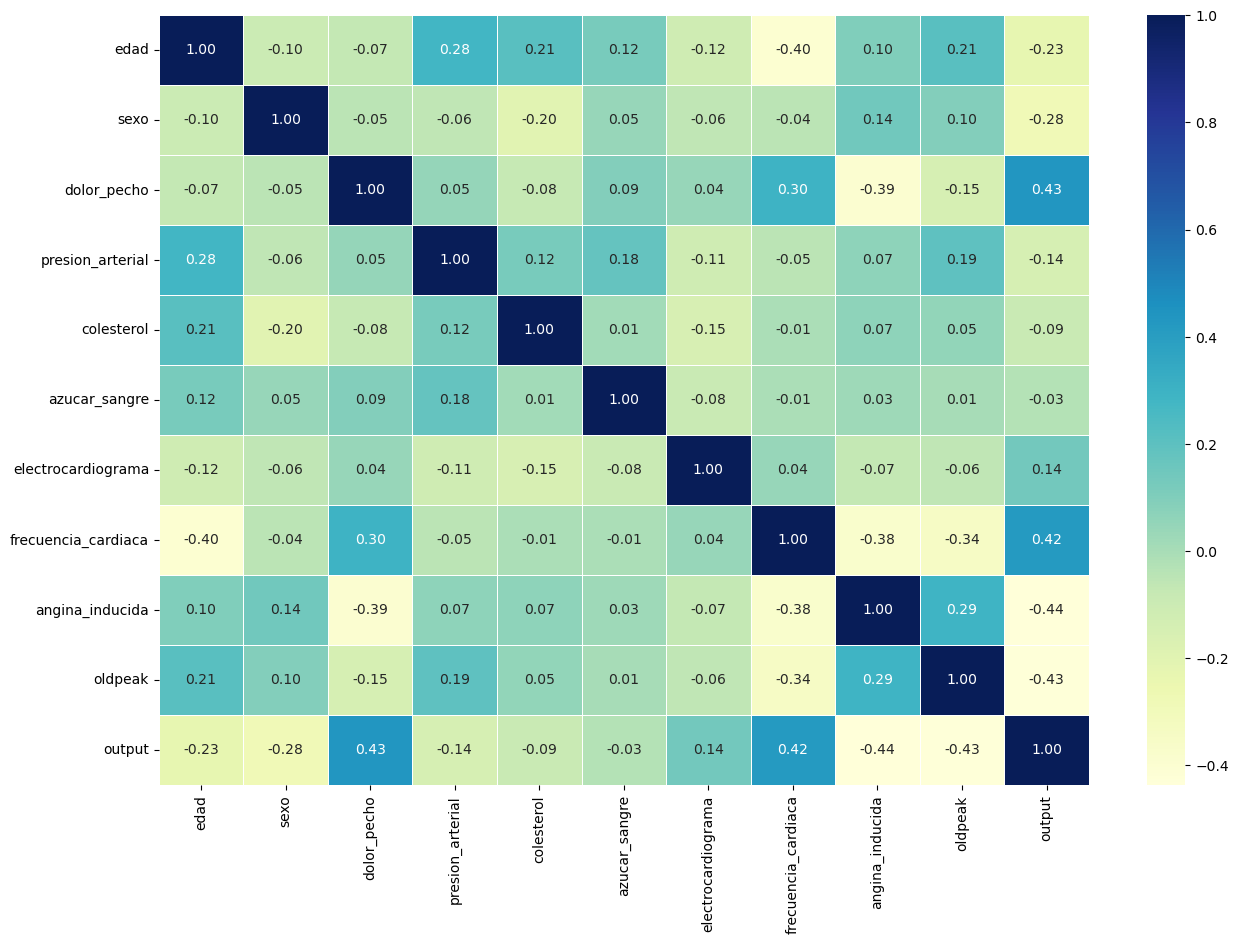

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## Modelado

In [14]:
# Separar las características y la etiqueta
X = data.drop('output', axis=1)
y = data['output']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Seleccionar modelos
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Crear función para ejecutar y comprobar modelos
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Se ajusta y evalúa a los modelos de aprendizaje automático dados.
    models : un diccionario de diferentes modelos de aprendizaje automático de Scikit-Learn
    X_train : datos de entrenamiento
    X_test : datos de prueba
    y_train : etiquetas asociadas con los datos de entrenamiento
    y_test : etiquetas asociadas con los datos de prueba
    """
    # Semilla aleatoria para obtener resultados reproducibles
    np.random.seed(42)
    # Crear un diccionario para almacenar las puntuaciones de los modelos
    model_scores = {}
    # Ejecutar modelos
    for name, model in models.items():
        # Ajustar el modelo a los datos
        model.fit(X_train, y_train)
        # Evaluar el modelo y añadir su puntuación al diccionario
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Ejecutar la función
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

# Mostrar resultados
model_scores

{'KNN': 0.8524590163934426,
 'Logistic Regression': 0.819672131147541,
 'Random Forest': 0.8524590163934426}

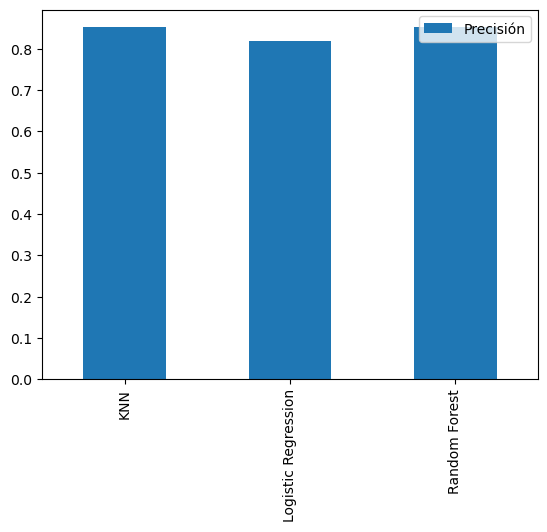

In [15]:
model_compare = pd.DataFrame(model_scores, index=['Precisión'])
model_compare.T.plot.bar();

In [16]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [17]:
train_scores

[1.0,
 0.8636363636363636,
 0.8512396694214877,
 0.8347107438016529,
 0.8347107438016529,
 0.8305785123966942,
 0.8140495867768595,
 0.8057851239669421,
 0.7933884297520661,
 0.8057851239669421,
 0.8099173553719008,
 0.8181818181818182,
 0.8223140495867769,
 0.8264462809917356,
 0.8140495867768595,
 0.8181818181818182,
 0.7975206611570248,
 0.8099173553719008,
 0.8016528925619835,
 0.8016528925619835]

Maximum KNN score on the test data: 88.52%


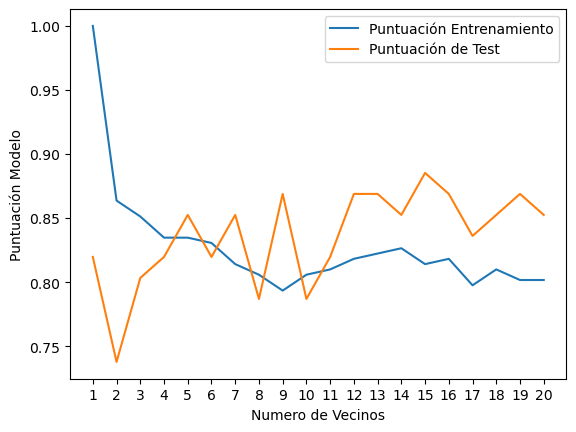

In [18]:
plt.plot(neighbors, train_scores, label="Puntuación Entrenamiento")
plt.plot(neighbors, test_scores, label="Puntuación de Test")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Numero de Vecinos")
plt.ylabel("Puntuación Modelo")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [19]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [20]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [21]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [22]:
rs_log_reg.score(X_test, y_test)

0.819672131147541

In [23]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [24]:
# Comprueba los mejores hiperparámetros
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [25]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8360655737704918

## Ajuste de un modelo con GridSearchCV

In [26]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [27]:
# Comprueba los mejores hiperparámetros
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [28]:
# Evaluar el modelo
gs_log_reg.score(X_test, y_test)

0.819672131147541

In [29]:
# Hecer prediciones en data test
y_preds = gs_log_reg.predict(X_test)

In [30]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [31]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: output, Length: 61, dtype: int64

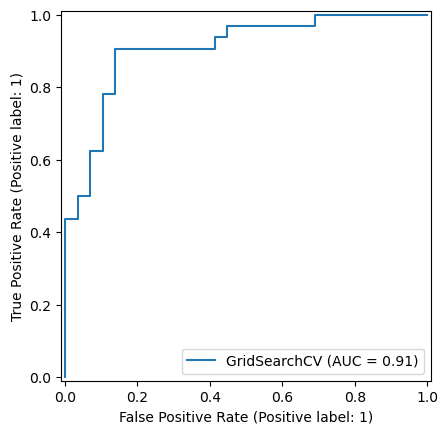

In [32]:
## Graficar la curva ROC y calcular la métrica AUC
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [33]:
# Muestra Matriz confusion
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 7 25]]


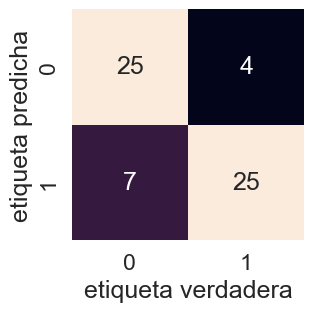

In [34]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
   Dibuja la matriz de confusión utilizando el mapa de calor de Seaborn().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("etiqueta verdadera")
    plt.ylabel("etiqueta predicha")
    
plot_conf_mat(y_test, y_preds)

## Informe clasificación

In [35]:
# Muestra informe clasificación
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [36]:
# Comprueba los mejores hiperparámetros
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [37]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [38]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.73770492, 0.85245902, 0.83606557, 0.8       , 0.75      ])

In [39]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7952459016393443

In [40]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision


0.79134483986776

In [41]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8484848484848484

In [42]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8179620433599037

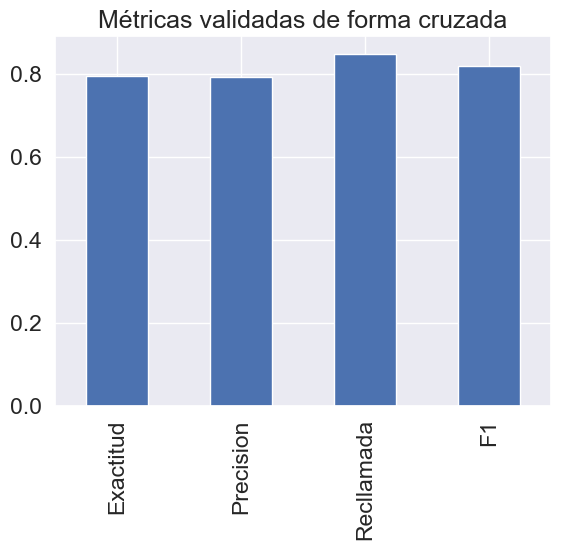

In [43]:
# Visualización de métricas con validación cruzada
cv_metrics = pd.DataFrame({"Exactitud": cv_acc,
                            "Precision": cv_precision,
                            "Recllamada": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Métricas validadas de forma cruzada", legend=False);

## Importancia de las características
Dado que estamos utilizando la regresión logística, veremos una forma de calcular la importancia de las características.

In [44]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);
# Check coef_
clf.coef_

array([[-2.21104688e-01, -7.37150153e-01,  7.25771505e-01,
        -1.78887575e-01, -9.14050989e-02,  6.40020228e-04,
         1.68440356e-01,  4.16752838e-01, -4.69392375e-01,
        -7.94495091e-01]])

In [45]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'edad': -0.22110468814161505,
 'sexo': -0.7371501530066124,
 'dolor_pecho': 0.7257715054921448,
 'presion_arterial': -0.1788875747109523,
 'colesterol': -0.09140509888339585,
 'azucar_sangre': 0.0006400202278307551,
 'electrocardiograma': 0.16844035637247176,
 'frecuencia_cardiaca': 0.4167528375209813,
 'angina_inducida': -0.4693923752463913,
 'oldpeak': -0.7944950914806318}

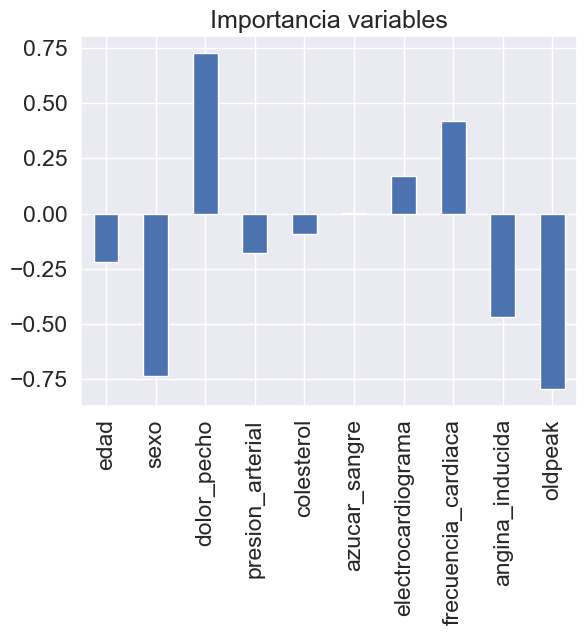

In [46]:
# Visualizar la importancia de las características
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Importancia variables", legend=False);

Cuanto mayor sea el valor (barra más grande), más contribuye la característica a la decisión de los modelos.

Si el valor es negativo, significa que hay una correlación negativa. Y viceversa para los valores positivos.

Por ejemplo, el atributo de sexo tiene un valor negativo de -0,74, lo que significa que a medida que aumenta el valor de sexo, el valor objetivo disminuye.

Podemos ver esto comparando la columna de sexo con la columna de objetivo.

In [47]:
pd.crosstab(df["sexo"], df["output"])

output,0,1
sexo,,
0,24,72
1,114,93


Cuando el sexo es 0 (mujer), hay casi 3 veces más personas (72 frente a 24) con enfermedad cardíaca (objetivo = 1) que sin ella.

Y luego, cuando el sexo aumenta a 1 (hombre), la proporción disminuye a casi 1 a 1 (114 frente a 93) de personas que tienen enfermedad cardíaca y personas que no la tienen.

Esto significa que el modelo ha encontrado un patrón que refleja los datos. Si observamos estas cifras y este conjunto de datos específico, parece que si el paciente es mujer, es más probable que tenga enfermedad cardíaca.

In [48]:
# Contraste frecuencia cardiaca 
pd.crosstab(df["frecuencia_cardiaca"], df["output"])

output,0,1
frecuencia_cardiaca,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


La pendiente es la "pendiente del segmento ST de ejercicio máximo", donde:

0: pendiente ascendente: mejor frecuencia cardíaca con el ejercicio (poco común)

1: pendiente plana: cambio mínimo (corazón sano típico)

2: pendiente descendente: signos de corazón no sano

Según el modelo, existe una correlación positiva de 0,470, no tan fuerte como la del sexo y el objetivo, pero aún así mayor que 0.

Esta correlación positiva significa que nuestro modelo está captando el patrón de que, a medida que aumenta la pendiente, también lo hace el valor objetivo.

In [49]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

# Crear los widgets para cada dato del paciente
age = widgets.IntText(value=66, description='Edad:')
sex = widgets.Dropdown(options=[('Mujer', 0), ('Hombre', 1)], value=1, description='Sexo:')
cp = widgets.Dropdown(options=[('Típico anginoso', 0), ('Atípico', 1), ('No anginoso', 2), ('Asintomático', 3)], value=0, description='Dolor en pecho:')
trtbps = widgets.IntText(value=130, description='Presión arterial:')
chol = widgets.IntText(value=130, description='Colesterol:')
fbs = widgets.Dropdown(options=[('No', 0), ('Sí', 1)], value=0, description='Azúcar en sangre:')
restecg = widgets.Dropdown(options=[('Normal', 0), ('Anormalidad en onda ST-T', 1), ('Hipertrofia ventricular izquierda', 2)], value=0, description='Electrocardiograma:')
thalachh = widgets.IntText(value=140, description='Frecuencia cardíaca:')
exng = widgets.Dropdown(options=[('No', 0), ('Sí', 1)], value=0, description='Angina inducida:')
oldpeak = widgets.FloatText(value=0.0, description='Oldpeak:')

# Crear un botón para enviar los datos
submit_button = widgets.Button(description='Predecir Riesgo')

# Crear un widget para mostrar la salida
output = widgets.Output()

# Función que se ejecutará al hacer clic en el botón
def on_submit(b):
    # Recolectar datos del paciente
    datos_paciente = [
        age.value,
        sex.value,
        cp.value,
        trtbps.value,
        chol.value,
        fbs.value,
        restecg.value,
        thalachh.value,
        exng.value,
        oldpeak.value,
    ]
    
    # Escalar los datos del paciente igual que se hizo con los datos de entrenamiento
    datos_paciente_escalados = scaler.transform([datos_paciente])
    
    # Llamar a la función de predicción
    predecir_riesgo(datos_paciente_escalados)

def predecir_riesgo(datos):
    # Utilizar los modelos entrenados para predecir
    knn_result = models["KNN"].predict(datos)[0]
    knn_probability = models["KNN"].predict_proba(datos)[0][1] * 100  # Probabilidad de clase positiva
    
    logistic_result = models["Logistic Regression"].predict(datos)[0]
    logistic_probability = models["Logistic Regression"].predict_proba(datos)[0][1] * 100
    
    random_forest_result = models["Random Forest"].predict(datos)[0]
    random_forest_probability = models["Random Forest"].predict_proba(datos)[0][1] * 100
    
    # Convertir resultados binarios a texto
    knn_result_text = "Riesgo de enfermedad cardíaca" if knn_result == 1 else "No hay riesgo"
    logistic_result_text = "Riesgo de enfermedad cardíaca" if logistic_result == 1 else "No hay riesgo"
    random_forest_result_text = "Riesgo de enfermedad cardíaca" if random_forest_result == 1 else "No hay riesgo"
    
    # Limpiar la salida anterior
    with output:
        clear_output()
        print("Resultados de predicción para el paciente:")
        print(f"KNN: {knn_result_text} (Probabilidad: {knn_probability:.2f}%)")
        print(f"Logistic Regression: {logistic_result_text} (Probabilidad: {logistic_probability:.2f}%)")
        print(f"Random Forest: {random_forest_result_text} (Probabilidad: {random_forest_probability:.2f}%)")

# Conectar el botón a la función
submit_button.on_click(on_submit)

# Mostrar los widgets y la salida
display(age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, submit_button, output)



IntText(value=66, description='Edad:')

Dropdown(description='Sexo:', index=1, options=(('Mujer', 0), ('Hombre', 1)), value=1)

Dropdown(description='Dolor en pecho:', options=(('Típico anginoso', 0), ('Atípico', 1), ('No anginoso', 2), (…

IntText(value=130, description='Presión arterial:')

IntText(value=130, description='Colesterol:')

Dropdown(description='Azúcar en sangre:', options=(('No', 0), ('Sí', 1)), value=0)

Dropdown(description='Electrocardiograma:', options=(('Normal', 0), ('Anormalidad en onda ST-T', 1), ('Hipertr…

IntText(value=140, description='Frecuencia cardíaca:')

Dropdown(description='Angina inducida:', options=(('No', 0), ('Sí', 1)), value=0)

FloatText(value=0.0, description='Oldpeak:')

Button(description='Predecir Riesgo', style=ButtonStyle())

Output()

En los modelos que estás utilizando (KNN, Regresión Logística y Random Forest), la predicción por defecto es binaria, es decir, se predice "1" si el modelo cree que la persona tiene un riesgo de padecer enfermedad cardíaca y "0" si no. La probabilidad de que se dé una clase u otra se basa en un umbral, que por defecto suele ser el 50%. Esto significa que:

Si la probabilidad predicha es mayor o igual al 50%, el modelo predice 1 (es decir, riesgo de enfermedad cardíaca).
Si la probabilidad predicha es menor al 50%, el modelo predice 0 (es decir, no hay riesgo de enfermedad cardíaca).